<a href="https://colab.research.google.com/github/inesdarosa/visualizaciones_analisis/blob/main/C7_mediana_6h_dbscan_feedforward.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import os
from datetime import datetime
from datetime import date
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import MinMaxScaler

import math
from keras import models, layers, optimizers, regularizers
import random
from keras.layers import Dense, Activation, Dropout
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm

from sklearn.decomposition import PCA
import sklearn.neighbors
from sklearn.neighbors import kneighbors_graph
from sklearn import preprocessing
from sklearn.cluster import DBSCAN

In [3]:
indep_C7 = pd.read_csv('/content/drive/MyDrive/ejercicios_proyectos/ancap/DATACHALLENGE 2022/indep_C7.csv')

In [4]:
indep_C7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1049 entries, 0 to 1048
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1049 non-null   int64  
 1   tdc_phd.pi_21030    1048 non-null   float64
 2   tdc_phd.pic_21034   1048 non-null   float64
 3   tdc_phd.pi_21035    1048 non-null   float64
 4   tdc_phd.ti_21046    1048 non-null   float64
 5   tdc_phd.tic_21047   1048 non-null   float64
 6   tdc_phd.ti_21048    1048 non-null   float64
 7   tdc_phd.ti_21050    1048 non-null   float64
 8   tdc_phd.ti_21049    1048 non-null   float64
 9   tdc_phd.tic_21051   1048 non-null   float64
 10  tdc_phd.ti_21052    1048 non-null   float64
 11  tdc_phd.li_21018    1048 non-null   float64
 12  tdc_phd.lic_21022   1048 non-null   float64
 13  tdc_phd.fic_21018   1048 non-null   float64
 14  tdc_phd.fic_24002   1048 non-null   float64
 15  tdc_phd.fi_21019    1048 non-null   float64
 16  tdc_ph

In [5]:
indep_C7 = indep_C7.drop(['Unnamed: 0'], axis=1)
indep_C7 = indep_C7.drop(1048)

In [6]:
indep_C7

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,Contenido_C7_Total
0,0.822950,0.828340,0.850390,99.538420,74.100520,39.095540,146.655270,133.963400,133.960700,142.35582,...,452.574435,19.292030,20.500545,202.688870,26.805790,10.900415,20.879120,140.973370,42.186225,1.58
1,0.818255,0.828735,0.837565,102.348440,72.366000,31.766700,151.701355,134.497830,134.492235,145.12355,...,453.096310,20.234720,20.297700,175.962550,23.155510,10.845210,23.945960,143.887500,35.289840,0.87
2,0.821700,0.833630,0.851885,104.282020,75.835110,34.209830,150.374030,133.890080,133.893775,146.55833,...,430.011735,18.199170,20.497570,215.746375,33.092155,9.766465,18.967735,144.819105,37.779400,1.29
3,0.831545,0.845390,0.856660,103.022605,77.232510,28.429250,151.449585,134.733420,134.735405,147.79601,...,514.515205,17.453200,20.499545,285.436690,39.387850,9.381635,18.674365,146.075840,32.042325,1.90
4,0.817085,0.837985,0.847255,100.207360,77.798725,30.769290,148.100945,135.010385,134.990040,145.55636,...,451.301755,15.510420,20.498910,412.012370,46.110985,10.543075,16.638055,143.695970,32.648460,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,0.765955,0.829830,0.883575,93.394680,72.895990,39.241700,143.239405,129.723530,129.720350,140.38118,...,345.466630,18.224015,20.498600,280.821130,43.632125,10.351960,13.893960,138.741250,41.335090,1.64
1044,0.787395,0.828685,0.970645,93.684680,75.353260,46.744565,139.546805,130.070815,130.071650,137.57069,...,372.771105,21.634440,20.499570,367.380735,46.150395,10.899900,16.457490,136.351570,48.416965,0.77
1045,0.811500,0.828180,0.991355,92.718120,75.642360,49.031650,139.444000,130.282365,130.278885,137.27507,...,343.681205,18.547050,20.498925,348.554165,47.526410,11.050040,14.087620,135.809980,50.069850,2.79
1046,0.835270,0.827950,1.016040,92.918960,74.904570,52.014820,140.007210,130.499350,130.501735,137.91562,...,360.195780,20.135540,20.498490,309.076725,42.009955,11.100215,16.208370,136.539320,52.868845,2.00


In [7]:
indep_C7.dropna(inplace=True)
indep_C7

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,Contenido_C7_Total
0,0.822950,0.828340,0.850390,99.538420,74.100520,39.095540,146.655270,133.963400,133.960700,142.35582,...,452.574435,19.292030,20.500545,202.688870,26.805790,10.900415,20.879120,140.973370,42.186225,1.58
1,0.818255,0.828735,0.837565,102.348440,72.366000,31.766700,151.701355,134.497830,134.492235,145.12355,...,453.096310,20.234720,20.297700,175.962550,23.155510,10.845210,23.945960,143.887500,35.289840,0.87
2,0.821700,0.833630,0.851885,104.282020,75.835110,34.209830,150.374030,133.890080,133.893775,146.55833,...,430.011735,18.199170,20.497570,215.746375,33.092155,9.766465,18.967735,144.819105,37.779400,1.29
3,0.831545,0.845390,0.856660,103.022605,77.232510,28.429250,151.449585,134.733420,134.735405,147.79601,...,514.515205,17.453200,20.499545,285.436690,39.387850,9.381635,18.674365,146.075840,32.042325,1.90
4,0.817085,0.837985,0.847255,100.207360,77.798725,30.769290,148.100945,135.010385,134.990040,145.55636,...,451.301755,15.510420,20.498910,412.012370,46.110985,10.543075,16.638055,143.695970,32.648460,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,0.765955,0.829830,0.883575,93.394680,72.895990,39.241700,143.239405,129.723530,129.720350,140.38118,...,345.466630,18.224015,20.498600,280.821130,43.632125,10.351960,13.893960,138.741250,41.335090,1.64
1044,0.787395,0.828685,0.970645,93.684680,75.353260,46.744565,139.546805,130.070815,130.071650,137.57069,...,372.771105,21.634440,20.499570,367.380735,46.150395,10.899900,16.457490,136.351570,48.416965,0.77
1045,0.811500,0.828180,0.991355,92.718120,75.642360,49.031650,139.444000,130.282365,130.278885,137.27507,...,343.681205,18.547050,20.498925,348.554165,47.526410,11.050040,14.087620,135.809980,50.069850,2.79
1046,0.835270,0.827950,1.016040,92.918960,74.904570,52.014820,140.007210,130.499350,130.501735,137.91562,...,360.195780,20.135540,20.498490,309.076725,42.009955,11.100215,16.208370,136.539320,52.868845,2.00


In [8]:
'''
var = [0: 'tdc_phd.pi_21030', 1: 'tdc_phd.pic_21034', 2: 'tdc_phd.pi_21035', 3: 'tdc_phd.ti_21046', 4: 'tdc_phd.tic_21047', 5: 'tdc_phd.ti_21048',
             6: 'tdc_phd.ti_21050', 7: 'tdc_phd.ti_21049', 8: 'tdc_phd.tic_21051', 9: 'tdc_phd.ti_21052', 10: 'tdc_phd.li_21018', 11: 'tdc_phd.lic_21022',
             12: 'tdc_phd.fic_21018', 13: 'tdc_phd.fic_24002', 14: 'tdc_phd.fi_21019', 15: 'tdc_phd.fic_22001', 16: 'tdc_phd.fi_21020', 17: 'STMS_DI_21004',
             18: 'STMS_LAB_PM_2209-F', 19: 'STMS_PM_2104F', 20: 'STMS_DI_22001', 21: 'STMS_DI_FIC_24002', 22: 'TDC_PHD.FIC_21004', 23: 'TDC_PHD.TI_21004',
             24: 'TDC_PHD.FI_21008', 25: 'TDC_PHD.TI_21029', 26: 'TDC_PHD.PIC_22059', 27: 'TDC_PHD.FI_21012', 28: 'TDC_PHD.TI_21036', 29: 'TDC_PHD.PIC_21026',
             30: 'TDC_PHD.TI_21054', 31: 'TDC_PHD.TI_22001', 32: 'TDC_PHD.TI_24001', 34: 'Contenido_C7_Total']
'''

"\nvar = [0: 'tdc_phd.pi_21030', 1: 'tdc_phd.pic_21034', 2: 'tdc_phd.pi_21035', 3: 'tdc_phd.ti_21046', 4: 'tdc_phd.tic_21047', 5: 'tdc_phd.ti_21048',\n             6: 'tdc_phd.ti_21050', 7: 'tdc_phd.ti_21049', 8: 'tdc_phd.tic_21051', 9: 'tdc_phd.ti_21052', 10: 'tdc_phd.li_21018', 11: 'tdc_phd.lic_21022',\n             12: 'tdc_phd.fic_21018', 13: 'tdc_phd.fic_24002', 14: 'tdc_phd.fi_21019', 15: 'tdc_phd.fic_22001', 16: 'tdc_phd.fi_21020', 17: 'STMS_DI_21004',\n             18: 'STMS_LAB_PM_2209-F', 19: 'STMS_PM_2104F', 20: 'STMS_DI_22001', 21: 'STMS_DI_FIC_24002', 22: 'TDC_PHD.FIC_21004', 23: 'TDC_PHD.TI_21004',\n             24: 'TDC_PHD.FI_21008', 25: 'TDC_PHD.TI_21029', 26: 'TDC_PHD.PIC_22059', 27: 'TDC_PHD.FI_21012', 28: 'TDC_PHD.TI_21036', 29: 'TDC_PHD.PIC_21026',\n             30: 'TDC_PHD.TI_21054', 31: 'TDC_PHD.TI_22001', 32: 'TDC_PHD.TI_24001', 34: 'Contenido_C7_Total']\n"

In [9]:
# Se normalizan los datos con MinMax()
min_max_scaler = preprocessing.MinMaxScaler() 
indep_C7_escalado = min_max_scaler.fit_transform(indep_C7)
indep_C7_escalado = pd.DataFrame(indep_C7_escalado) 
indep_C7_escalado = indep_C7_escalado.rename(columns = {0: 'tdc_phd.pi_21030', 1: 'tdc_phd.pic_21034', 2: 'tdc_phd.pi_21035', 3: 'tdc_phd.ti_21046', 4: 'tdc_phd.tic_21047', 5: 'tdc_phd.ti_21048',
             6: 'tdc_phd.ti_21050', 7: 'tdc_phd.ti_21049', 8: 'tdc_phd.tic_21051', 9: 'tdc_phd.ti_21052', 10: 'tdc_phd.li_21018', 11: 'tdc_phd.lic_21022',
             12: 'tdc_phd.fic_21018', 13: 'tdc_phd.fic_24002', 14: 'tdc_phd.fi_21019', 15: 'tdc_phd.fic_22001', 16: 'tdc_phd.fi_21020', 17: 'STMS_DI_21004',
             18: 'STMS_LAB_PM_2209-F', 19: 'STMS_PM_2104F', 20: 'STMS_DI_22001', 21: 'STMS_DI_FIC_24002', 22: 'TDC_PHD.FIC_21004', 23: 'TDC_PHD.TI_21004',
             24: 'TDC_PHD.FI_21008', 25: 'TDC_PHD.TI_21029', 26: 'TDC_PHD.PIC_22059', 27: 'TDC_PHD.FI_21012', 28: 'TDC_PHD.TI_21036', 29: 'TDC_PHD.PIC_21026',
             30: 'TDC_PHD.TI_21054', 31: 'TDC_PHD.TI_22001', 32: 'TDC_PHD.TI_24001', 33: 'Contenido_C7_Total'})

In [10]:
indep_C7_escalado

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,Contenido_C7_Total
0,0.472933,0.622251,0.292208,0.908154,0.278767,0.521095,0.943637,0.982515,0.982451,0.938330,...,0.610676,0.445124,0.510694,0.281999,0.099135,0.639509,0.646173,0.937802,0.620255,0.093245
1,0.454569,0.624832,0.246324,0.937819,0.116084,0.368801,0.976106,0.986435,0.986350,0.956573,...,0.611380,0.484340,0.000000,0.244815,0.000000,0.624739,0.762167,0.957188,0.494236,0.041116
2,0.468043,0.656829,0.297556,0.958231,0.441457,0.419570,0.967565,0.981978,0.981961,0.966031,...,0.580231,0.399660,0.503204,0.300166,0.269860,0.336126,0.573881,0.963385,0.539728,0.071953
3,0.506552,0.733699,0.314640,0.944936,0.572521,0.299448,0.974486,0.988163,0.988133,0.974189,...,0.694255,0.368626,0.508176,0.397125,0.440839,0.233167,0.562785,0.971745,0.434894,0.116740
4,0.449992,0.685296,0.280992,0.915216,0.625628,0.348075,0.952939,0.990194,0.990000,0.959426,...,0.608958,0.287805,0.506577,0.573228,0.623426,0.543904,0.485768,0.955914,0.445970,0.027166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.250000,0.631990,0.410933,0.843296,0.165792,0.524132,0.921658,0.951419,0.951353,0.925314,...,0.466151,0.400693,0.505797,0.390703,0.556105,0.492772,0.381982,0.922953,0.604702,0.097651
1043,0.333861,0.624506,0.722443,0.846357,0.396263,0.680043,0.897899,0.953966,0.953930,0.906789,...,0.502994,0.542570,0.508239,0.511133,0.624496,0.639371,0.478939,0.907056,0.734111,0.033774
1044,0.428147,0.621205,0.796537,0.836154,0.423379,0.727568,0.897237,0.955518,0.955449,0.904841,...,0.463742,0.414132,0.506615,0.484940,0.661866,0.679540,0.389306,0.903454,0.764314,0.182085
1045,0.521122,0.619701,0.884852,0.838274,0.354180,0.789559,0.900861,0.957109,0.957084,0.909063,...,0.486026,0.480214,0.505520,0.430015,0.512050,0.692964,0.469517,0.908305,0.815461,0.124082


In [11]:
df_escalado = indep_C7_escalado[indep_C7_escalado.columns[:33]]
df_escalado

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.TI_21004,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001
0,0.472933,0.622251,0.292208,0.908154,0.278767,0.521095,0.943637,0.982515,0.982451,0.938330,...,0.242754,0.610676,0.445124,0.510694,0.281999,0.099135,0.639509,0.646173,0.937802,0.620255
1,0.454569,0.624832,0.246324,0.937819,0.116084,0.368801,0.976106,0.986435,0.986350,0.956573,...,0.310755,0.611380,0.484340,0.000000,0.244815,0.000000,0.624739,0.762167,0.957188,0.494236
2,0.468043,0.656829,0.297556,0.958231,0.441457,0.419570,0.967565,0.981978,0.981961,0.966031,...,0.213621,0.580231,0.399660,0.503204,0.300166,0.269860,0.336126,0.573881,0.963385,0.539728
3,0.506552,0.733699,0.314640,0.944936,0.572521,0.299448,0.974486,0.988163,0.988133,0.974189,...,0.193252,0.694255,0.368626,0.508176,0.397125,0.440839,0.233167,0.562785,0.971745,0.434894
4,0.449992,0.685296,0.280992,0.915216,0.625628,0.348075,0.952939,0.990194,0.990000,0.959426,...,0.180322,0.608958,0.287805,0.506577,0.573228,0.623426,0.543904,0.485768,0.955914,0.445970
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.250000,0.631990,0.410933,0.843296,0.165792,0.524132,0.921658,0.951419,0.951353,0.925314,...,0.180861,0.466151,0.400693,0.505797,0.390703,0.556105,0.492772,0.381982,0.922953,0.604702
1043,0.333861,0.624506,0.722443,0.846357,0.396263,0.680043,0.897899,0.953966,0.953930,0.906789,...,0.347903,0.502994,0.542570,0.508239,0.511133,0.624496,0.639371,0.478939,0.907056,0.734111
1044,0.428147,0.621205,0.796537,0.836154,0.423379,0.727568,0.897237,0.955518,0.955449,0.904841,...,0.247771,0.463742,0.414132,0.506615,0.484940,0.661866,0.679540,0.389306,0.903454,0.764314
1045,0.521122,0.619701,0.884852,0.838274,0.354180,0.789559,0.900861,0.957109,0.957084,0.909063,...,0.289300,0.486026,0.480214,0.505520,0.430015,0.512050,0.692964,0.469517,0.908305,0.815461


In [ ]:
'''
ESTO DA RARO

## Parametrización de DBSCAN.
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(df_escalado)
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(X_pca)
minPts  = 5 # Fijamos el parámetro minPts
A = kneighbors_graph(X_pca, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(X_pca):
    for j in range(len(X_pca)):
        if Ar[i][j] != 0:
            seq.append(matsim[i][j])
seq.sort()
plt.plot(seq)
plt.show()'''

In [ ]:
var_indep = ['tdc_phd.pi_21030', 'tdc_phd.pic_21034', 'tdc_phd.pi_21035', 'tdc_phd.ti_21046', 'tdc_phd.tic_21047', 'tdc_phd.ti_21048',
             'tdc_phd.ti_21050', 'tdc_phd.ti_21049', 'tdc_phd.tic_21051', 'tdc_phd.ti_21052', 'tdc_phd.li_21018', 'tdc_phd.lic_21022',
             'tdc_phd.fic_21018', 'tdc_phd.fic_24002', 'tdc_phd.fi_21019', 'tdc_phd.fic_22001', 'tdc_phd.fi_21020', 'STMS_DI_21004',
             'STMS_LAB_PM_2209-F', 'STMS_PM_2104F', 'STMS_DI_22001', 'STMS_DI_FIC_24002', 'TDC_PHD.FIC_21004', 'TDC_PHD.TI_21004',
             'TDC_PHD.FI_21008', 'TDC_PHD.TI_21029', 'TDC_PHD.PIC_22059', 'TDC_PHD.FI_21012', 'TDC_PHD.TI_21036', 'TDC_PHD.PIC_21026',
             'TDC_PHD.TI_21054', 'TDC_PHD.TI_22001', 'TDC_PHD.TI_24001', 'Contenido_C7_Total']

In [12]:
# Ejecutamos DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples = 30, metric = "euclidean").fit(df_escalado)
clusters = dbscan.fit_predict(df_escalado)

In [13]:
# Vemos cada uno de los clusters cuántos valores tiene.
copy = pd.DataFrame()
copy['tdc_phd.pi_21030'] = df_escalado['tdc_phd.pi_21030'].values
copy['tdc_phd.pic_21034'] = df_escalado['tdc_phd.pic_21034'].values
copy['tdc_phd.pi_21035'] = df_escalado['tdc_phd.pi_21035'].values
copy['tdc_phd.ti_21046'] = df_escalado['tdc_phd.ti_21046'].values
copy['tdc_phd.tic_21047'] = df_escalado['tdc_phd.tic_21047'].values
copy['tdc_phd.ti_21048'] = df_escalado['tdc_phd.ti_21048'].values
copy['tdc_phd.ti_21050'] = df_escalado['tdc_phd.ti_21050'].values
copy['tdc_phd.ti_21049'] = df_escalado['tdc_phd.ti_21049'].values
copy['tdc_phd.tic_21051'] = df_escalado['tdc_phd.tic_21051'].values
copy['tdc_phd.ti_21052'] = df_escalado['tdc_phd.ti_21052'].values
copy['tdc_phd.li_21018'] = df_escalado['tdc_phd.li_21018'].values
copy['tdc_phd.lic_21022'] = df_escalado['tdc_phd.lic_21022'].values
copy['tdc_phd.fic_21018'] = df_escalado['tdc_phd.fic_21018'].values
copy['tdc_phd.fic_24002'] = df_escalado['tdc_phd.fic_24002'].values
copy['tdc_phd.fi_21019'] = df_escalado['tdc_phd.fi_21019'].values
copy['tdc_phd.fic_22001'] = df_escalado['tdc_phd.fic_22001'].values
copy['tdc_phd.fi_21020'] = df_escalado['tdc_phd.fi_21020'].values
copy['STMS_DI_21004'] = df_escalado['STMS_DI_21004'].values
copy['STMS_LAB_PM_2209-F'] = df_escalado['STMS_LAB_PM_2209-F'].values
copy['STMS_PM_2104F'] = df_escalado['STMS_PM_2104F'].values
copy['STMS_DI_22001'] = df_escalado['STMS_DI_22001'].values
copy['STMS_DI_FIC_24002'] = df_escalado['STMS_DI_FIC_24002'].values
copy['TDC_PHD.FIC_21004'] = df_escalado['TDC_PHD.FIC_21004'].values
copy['TDC_PHD.TI_21004'] = df_escalado['TDC_PHD.TI_21004'].values
copy['TDC_PHD.FI_21008'] = df_escalado['TDC_PHD.FI_21008'].values
copy['TDC_PHD.TI_21029'] = df_escalado['TDC_PHD.TI_21029'].values
copy['TDC_PHD.PIC_22059'] = df_escalado['TDC_PHD.PIC_22059'].values
copy['TDC_PHD.FI_21012'] = df_escalado['TDC_PHD.FI_21012'].values
copy['TDC_PHD.TI_21036'] = df_escalado['TDC_PHD.TI_21036'].values
copy['TDC_PHD.PIC_21026'] = df_escalado['TDC_PHD.PIC_21026'].values
copy['TDC_PHD.TI_21054'] = df_escalado['TDC_PHD.TI_21054'].values
copy['TDC_PHD.TI_22001'] = df_escalado['TDC_PHD.TI_22001'].values
copy['TDC_PHD.TI_24001'] = df_escalado['TDC_PHD.TI_24001'].values
#copy['Contenido_C7_Total'] = df_escalado['Contenido_C7_Total'].values
copy['label'] = clusters;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,cantidad
label,
-1,105
0,942


In [14]:
copy

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,label
0,0.472933,0.622251,0.292208,0.908154,0.278767,0.521095,0.943637,0.982515,0.982451,0.938330,...,0.610676,0.445124,0.510694,0.281999,0.099135,0.639509,0.646173,0.937802,0.620255,-1
1,0.454569,0.624832,0.246324,0.937819,0.116084,0.368801,0.976106,0.986435,0.986350,0.956573,...,0.611380,0.484340,0.000000,0.244815,0.000000,0.624739,0.762167,0.957188,0.494236,-1
2,0.468043,0.656829,0.297556,0.958231,0.441457,0.419570,0.967565,0.981978,0.981961,0.966031,...,0.580231,0.399660,0.503204,0.300166,0.269860,0.336126,0.573881,0.963385,0.539728,0
3,0.506552,0.733699,0.314640,0.944936,0.572521,0.299448,0.974486,0.988163,0.988133,0.974189,...,0.694255,0.368626,0.508176,0.397125,0.440839,0.233167,0.562785,0.971745,0.434894,0
4,0.449992,0.685296,0.280992,0.915216,0.625628,0.348075,0.952939,0.990194,0.990000,0.959426,...,0.608958,0.287805,0.506577,0.573228,0.623426,0.543904,0.485768,0.955914,0.445970,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.250000,0.631990,0.410933,0.843296,0.165792,0.524132,0.921658,0.951419,0.951353,0.925314,...,0.466151,0.400693,0.505797,0.390703,0.556105,0.492772,0.381982,0.922953,0.604702,0
1043,0.333861,0.624506,0.722443,0.846357,0.396263,0.680043,0.897899,0.953966,0.953930,0.906789,...,0.502994,0.542570,0.508239,0.511133,0.624496,0.639371,0.478939,0.907056,0.734111,0
1044,0.428147,0.621205,0.796537,0.836154,0.423379,0.727568,0.897237,0.955518,0.955449,0.904841,...,0.463742,0.414132,0.506615,0.484940,0.661866,0.679540,0.389306,0.903454,0.764314,0
1045,0.521122,0.619701,0.884852,0.838274,0.354180,0.789559,0.900861,0.957109,0.957084,0.909063,...,0.486026,0.480214,0.505520,0.430015,0.512050,0.692964,0.469517,0.908305,0.815461,0


In [15]:
indep_C7_desescalado = min_max_scaler.inverse_transform(indep_C7_escalado)

In [16]:
indep_C7_desescalado

array([[  0.82295 ,   0.82834 ,   0.85039 , ..., 140.97337 ,  42.186225,
          1.58    ],
       [  0.818255,   0.828735,   0.837565, ..., 143.8875  ,  35.28984 ,
          0.87    ],
       [  0.8217  ,   0.83363 ,   0.851885, ..., 144.819105,  37.7794  ,
          1.29    ],
       ...,
       [  0.8115  ,   0.82818 ,   0.991355, ..., 135.80998 ,  50.06985 ,
          2.79    ],
       [  0.83527 ,   0.82795 ,   1.01604 , ..., 136.53932 ,  52.868845,
          2.      ],
       [  0.779925,   0.82871 ,   0.964615, ..., 136.74554 ,  45.70768 ,
          1.66    ]])

In [17]:
indep_C7_desescalado.shape

(1047, 34)

In [18]:
df_indep_C7_desescalado = pd.DataFrame(indep_C7_desescalado) 
df_indep_C7_desescalado = df_indep_C7_desescalado.rename(columns = {0: 'tdc_phd.pi_21030', 1: 'tdc_phd.pic_21034', 2: 'tdc_phd.pi_21035', 3: 'tdc_phd.ti_21046', 4: 'tdc_phd.tic_21047', 5: 'tdc_phd.ti_21048',
             6: 'tdc_phd.ti_21050', 7: 'tdc_phd.ti_21049', 8: 'tdc_phd.tic_21051', 9: 'tdc_phd.ti_21052', 10: 'tdc_phd.li_21018', 11: 'tdc_phd.lic_21022',
             12: 'tdc_phd.fic_21018', 13: 'tdc_phd.fic_24002', 14: 'tdc_phd.fi_21019', 15: 'tdc_phd.fic_22001', 16: 'tdc_phd.fi_21020', 17: 'STMS_DI_21004',
             18: 'STMS_LAB_PM_2209-F', 19: 'STMS_PM_2104F', 20: 'STMS_DI_22001', 21: 'STMS_DI_FIC_24002', 22: 'TDC_PHD.FIC_21004', 23: 'TDC_PHD.TI_21004',
             24: 'TDC_PHD.FI_21008', 25: 'TDC_PHD.TI_21029', 26: 'TDC_PHD.PIC_22059', 27: 'TDC_PHD.FI_21012', 28: 'TDC_PHD.TI_21036', 29: 'TDC_PHD.PIC_21026',
             30: 'TDC_PHD.TI_21054', 31: 'TDC_PHD.TI_22001', 32: 'TDC_PHD.TI_24001', 33: 'Contenido_C7_Total'})

In [19]:
df_indep_C7_desescalado

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,Contenido_C7_Total
0,0.822950,0.828340,0.850390,99.538420,74.100520,39.095540,146.655270,133.963400,133.960700,142.35582,...,452.574435,19.292030,20.500545,202.688870,26.805790,10.900415,20.879120,140.973370,42.186225,1.58
1,0.818255,0.828735,0.837565,102.348440,72.366000,31.766700,151.701355,134.497830,134.492235,145.12355,...,453.096310,20.234720,20.297700,175.962550,23.155510,10.845210,23.945960,143.887500,35.289840,0.87
2,0.821700,0.833630,0.851885,104.282020,75.835110,34.209830,150.374030,133.890080,133.893775,146.55833,...,430.011735,18.199170,20.497570,215.746375,33.092155,9.766465,18.967735,144.819105,37.779400,1.29
3,0.831545,0.845390,0.856660,103.022605,77.232510,28.429250,151.449585,134.733420,134.735405,147.79601,...,514.515205,17.453200,20.499545,285.436690,39.387850,9.381635,18.674365,146.075840,32.042325,1.90
4,0.817085,0.837985,0.847255,100.207360,77.798725,30.769290,148.100945,135.010385,134.990040,145.55636,...,451.301755,15.510420,20.498910,412.012370,46.110985,10.543075,16.638055,143.695970,32.648460,0.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.765955,0.829830,0.883575,93.394680,72.895990,39.241700,143.239405,129.723530,129.720350,140.38118,...,345.466630,18.224015,20.498600,280.821130,43.632125,10.351960,13.893960,138.741250,41.335090,1.64
1043,0.787395,0.828685,0.970645,93.684680,75.353260,46.744565,139.546805,130.070815,130.071650,137.57069,...,372.771105,21.634440,20.499570,367.380735,46.150395,10.899900,16.457490,136.351570,48.416965,0.77
1044,0.811500,0.828180,0.991355,92.718120,75.642360,49.031650,139.444000,130.282365,130.278885,137.27507,...,343.681205,18.547050,20.498925,348.554165,47.526410,11.050040,14.087620,135.809980,50.069850,2.79
1045,0.835270,0.827950,1.016040,92.918960,74.904570,52.014820,140.007210,130.499350,130.501735,137.91562,...,360.195780,20.135540,20.498490,309.076725,42.009955,11.100215,16.208370,136.539320,52.868845,2.00


In [20]:
indep_C7_label = pd.concat([df_indep_C7_desescalado, copy[copy.columns[33:]]], axis=1)

In [21]:
indep_C7_label

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,Contenido_C7_Total,label
0,0.822950,0.828340,0.850390,99.538420,74.100520,39.095540,146.655270,133.963400,133.960700,142.35582,...,19.292030,20.500545,202.688870,26.805790,10.900415,20.879120,140.973370,42.186225,1.58,-1
1,0.818255,0.828735,0.837565,102.348440,72.366000,31.766700,151.701355,134.497830,134.492235,145.12355,...,20.234720,20.297700,175.962550,23.155510,10.845210,23.945960,143.887500,35.289840,0.87,-1
2,0.821700,0.833630,0.851885,104.282020,75.835110,34.209830,150.374030,133.890080,133.893775,146.55833,...,18.199170,20.497570,215.746375,33.092155,9.766465,18.967735,144.819105,37.779400,1.29,0
3,0.831545,0.845390,0.856660,103.022605,77.232510,28.429250,151.449585,134.733420,134.735405,147.79601,...,17.453200,20.499545,285.436690,39.387850,9.381635,18.674365,146.075840,32.042325,1.90,0
4,0.817085,0.837985,0.847255,100.207360,77.798725,30.769290,148.100945,135.010385,134.990040,145.55636,...,15.510420,20.498910,412.012370,46.110985,10.543075,16.638055,143.695970,32.648460,0.68,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.765955,0.829830,0.883575,93.394680,72.895990,39.241700,143.239405,129.723530,129.720350,140.38118,...,18.224015,20.498600,280.821130,43.632125,10.351960,13.893960,138.741250,41.335090,1.64,0
1043,0.787395,0.828685,0.970645,93.684680,75.353260,46.744565,139.546805,130.070815,130.071650,137.57069,...,21.634440,20.499570,367.380735,46.150395,10.899900,16.457490,136.351570,48.416965,0.77,0
1044,0.811500,0.828180,0.991355,92.718120,75.642360,49.031650,139.444000,130.282365,130.278885,137.27507,...,18.547050,20.498925,348.554165,47.526410,11.050040,14.087620,135.809980,50.069850,2.79,0
1045,0.835270,0.827950,1.016040,92.918960,74.904570,52.014820,140.007210,130.499350,130.501735,137.91562,...,20.135540,20.498490,309.076725,42.009955,11.100215,16.208370,136.539320,52.868845,2.00,0


In [22]:
indep_C7_label_sin_outlier = indep_C7_label.drop(indep_C7_label[indep_C7_label['label'] == -1].index)

In [23]:
indep_C7_sin_outlier = indep_C7_label_sin_outlier.drop(['label'], axis=1)

In [24]:
indep_C7_sin_outlier

,tdc_phd.pi_21030,tdc_phd.pic_21034,tdc_phd.pi_21035,tdc_phd.ti_21046,tdc_phd.tic_21047,tdc_phd.ti_21048,tdc_phd.ti_21050,tdc_phd.ti_21049,tdc_phd.tic_21051,tdc_phd.ti_21052,...,TDC_PHD.FI_21008,TDC_PHD.TI_21029,TDC_PHD.PIC_22059,TDC_PHD.FI_21012,TDC_PHD.TI_21036,TDC_PHD.PIC_21026,TDC_PHD.TI_21054,TDC_PHD.TI_22001,TDC_PHD.TI_24001,Contenido_C7_Total
2,0.821700,0.833630,0.851885,104.282020,75.835110,34.209830,150.374030,133.890080,133.893775,146.558330,...,430.011735,18.199170,20.497570,215.746375,33.092155,9.766465,18.967735,144.819105,37.779400,1.29
3,0.831545,0.845390,0.856660,103.022605,77.232510,28.429250,151.449585,134.733420,134.735405,147.796010,...,514.515205,17.453200,20.499545,285.436690,39.387850,9.381635,18.674365,146.075840,32.042325,1.90
4,0.817085,0.837985,0.847255,100.207360,77.798725,30.769290,148.100945,135.010385,134.990040,145.556360,...,451.301755,15.510420,20.498910,412.012370,46.110985,10.543075,16.638055,143.695970,32.648460,0.68
9,0.821565,0.831180,0.860070,97.715000,77.442325,30.473410,145.306015,132.428750,132.426865,142.826635,...,504.100670,18.424375,20.500015,312.984580,47.405210,11.149875,18.894790,141.775570,34.435995,1.10
10,0.786440,0.831500,0.837020,94.509490,77.268650,37.561440,144.779845,132.512175,132.522220,142.170610,...,642.075190,21.869570,20.500590,285.404140,45.919955,11.450110,20.061140,140.936350,40.507820,3.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.765955,0.829830,0.883575,93.394680,72.895990,39.241700,143.239405,129.723530,129.720350,140.381180,...,345.466630,18.224015,20.498600,280.821130,43.632125,10.351960,13.893960,138.741250,41.335090,1.64
1043,0.787395,0.828685,0.970645,93.684680,75.353260,46.744565,139.546805,130.070815,130.071650,137.570690,...,372.771105,21.634440,20.499570,367.380735,46.150395,10.899900,16.457490,136.351570,48.416965,0.77
1044,0.811500,0.828180,0.991355,92.718120,75.642360,49.031650,139.444000,130.282365,130.278885,137.275070,...,343.681205,18.547050,20.498925,348.554165,47.526410,11.050040,14.087620,135.809980,50.069850,2.79
1045,0.835270,0.827950,1.016040,92.918960,74.904570,52.014820,140.007210,130.499350,130.501735,137.915620,...,360.195780,20.135540,20.498490,309.076725,42.009955,11.100215,16.208370,136.539320,52.868845,2.00


In [25]:
X_train, X_test, y_train, y_test = train_test_split(indep_C7_sin_outlier[indep_C7_sin_outlier.columns[:-1]], indep_C7_sin_outlier[indep_C7_sin_outlier.columns[33:]], test_size=0.2, random_state=42)

In [26]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(753, 33)
(753, 1)
(189, 33)
(189, 1)


In [27]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape, type(X_train), type(y_train))

(753, 33) (189, 33) (753, 1) (189, 1) <class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [28]:
XY_scaler = MinMaxScaler()
X_data_train = XY_scaler.fit_transform(X_train)
Y_data_train = XY_scaler.fit_transform(y_train)

X_data_test = XY_scaler.fit_transform(X_test)
Y_data_test = XY_scaler.fit_transform(y_test)

In [29]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=33,
                       units=64, 
                       activation='relu'))


model.add(layers.Dense(input_dim=64,
                       units=32,
                       activation='relu'))
model.add(layers.Dropout(0.2))

# add the output layer
model.add(layers.Dense(input_dim=32,
                       units=1,
                       activation='linear'))

# define our loss function and optimizer
model.compile(loss='mean_squared_error',
              # Adam is a kind of gradient descent
              optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                2176      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_data_train, Y_data_train, epochs=200, batch_size=20)

Epoch 1/200
38/38 [==============================] - 1s 2ms/step - loss: 0.0150
Epoch 2/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0083
Epoch 3/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0074
Epoch 4/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 5/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0069
Epoch 6/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0065
Epoch 7/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 8/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 9/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 10/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 11/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0061
Epoch 12/200
38/38 [==============================] - 0s 2ms/step - loss: 0.0057
Epoch 13/200
38/38 [=================

In [32]:
ypred = model.predict(X_data_test)
print("MSE: %.4f" % mean_squared_error(Y_data_test, ypred))

6/6 [==============================] - 0s 2ms/step
MSE: 0.0165


In [33]:
ytest_orig = XY_scaler.inverse_transform(Y_data_test)
ypred_orig = XY_scaler.inverse_transform(ypred)

In [34]:
print("MSE sin escalar: %.4f" % mean_squared_error(ytest_orig, ypred_orig))

MSE sin escalar: 0.7327


In [35]:
print(sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig)))

[46]


In [36]:
len(ytest_orig) - sum((ypred_orig < (ytest_orig + (10*ytest_orig/100))) & ((ytest_orig - (10*ytest_orig/100)) < ypred_orig))

array([143])

In [41]:
46*100/189

24.33862433862434

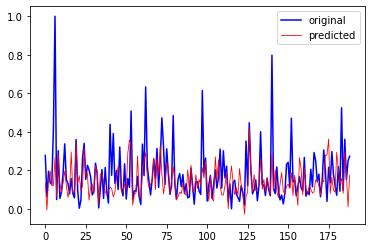

In [38]:
x_ax = range(len(ypred))
#plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, Y_data_test, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

In [39]:
history = model.fit(X_data_train, Y_data_train, epochs=100, batch_size=10)

# evaluate accuracy
train_acc = model.evaluate(X_data_train, Y_data_train, batch_size=32)
test_acc = model.evaluate(X_data_test, Y_data_test, batch_size=32)
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

Epoch 1/100
76/76 [==============================] - 0s 4ms/step - loss: 0.0029
Epoch 2/100
76/76 [==============================] - 0s 4ms/step - loss: 0.0030
Epoch 3/100
76/76 [==============================] - 0s 5ms/step - loss: 0.0044
Epoch 4/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 5/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0041
Epoch 6/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 7/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0027
Epoch 8/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0035
Epoch 9/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 10/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 11/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 12/100
76/76 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 13/100
76/76 [=================

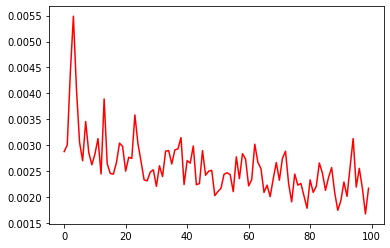

In [40]:
losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()